## IAAF tablice

_Projekt pri predmetu Programiranje 1_

S spletne strani https://www.iaaf.org/records/all-time-toplists/middlelong/5000-metres/outdoor/women/senior sem zajela podatke o najboljših rezultatih žensk na 5000m med letoma 2001 in 2017. Te rezultate bom tekom naloge analizirala.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import datetime 
import time

%matplotlib inline

tablice= pd.read_csv('lists.csv', encoding = "utf-8")

#datume in čase spremenimo v pravo obliko, da lahko kasneje dostopamo do njih
#kjer daum rojstva ni popoln ga spremenimo v None
# (tako ali tako nimajo vsi razulati datuma rojstva, tako da to ne bo vplivalo na točnost analize)
tablice['DOB'] = pd.to_datetime(tablice['DOB'], format="%d %b %Y",  errors='coerce')
tablice['date'] = pd.to_datetime(tablice['date'], format="%d %b %Y")

pd.options.display.max_rows = 20

Za lažjo predstavo najprej poglejmo, kako sploh izgledajo tablice.

In [2]:
tablice.sort_values('time').head(10)

,rank,time,date,name,position,DOB,venue,nationality
3059,1,14:11.15,2008-06-06,Tirunesh DIBABA,1,1985-06-01,Oslo (NOR),ETH
15471,1,14:12.59,2016-06-02,Almaz AYANA,1,1991-11-21,Roma (ITA),ETH
3060,2,14:12.88,2008-07-22,Meseret DEFAR,1,1983-11-19,Stockholm (SWE),ETH
13496,1,14:14.32,2015-05-17,Almaz AYANA,1,1991-11-21,Shanghai (CHN),ETH
13497,2,14:15.41,2015-07-04,Genzebe DIBABA,1,1991-02-08,Paris (FRA),ETH
2571,1,14:16.63,2007-06-15,Meseret DEFAR,1,1983-11-19,Oslo (NOR),ETH
17458,1,14:18.37,2017-06-08,Hellen OBIRI,1,1989-12-13,Roma (ITA),KEN
6192,1,14:20.87,2011-07-29,Vivian Jepkemoi CHERUIYOT,1,1983-09-11,Stockholm (SWE),KEN
2572,2,14:22.51,2007-06-15,Vivian Jepkemoi CHERUIYOT,2,1983-09-11,Oslo (NOR),KEN
9725,1,14:23.68,2013-07-06,Tirunesh DIBABA,1,1985-06-01,Paris (FRA),ETH



Najhitrejši čas je trenutno veljaven svetovni rekord.

In [3]:
casi = tablice['time'].value_counts()
casi[:10]

16:09.00    10
15:56.00     9
16:03.80     8
17:18.07     8
17:19.08     8
17:24.34     8
17:18.63     8
16:19.58     8
16:54.83     7
16:54.00     7
Name: time, dtype: int64

Malo za šalo, malo zares, med vsemi časi se je največkrat zgodilo, da se je ura ustavila na natanko 16:09. 

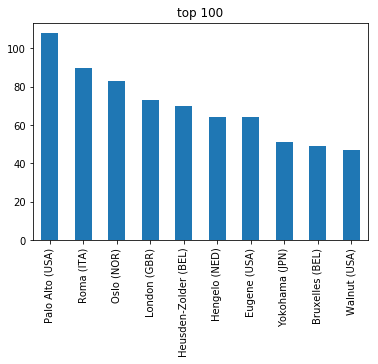

In [4]:
deseterica = tablice[tablice['rank'] <= 10]
stoterica = tablice[tablice['rank'] <= 100]

plt.figure()
stoterica['venue'].value_counts()[:10].plot(kind='bar', title = "top 100")

plt.show()

Najboljše uvrstitve atletinje dosegajo na stadionu Palo Alto v USA, veliko dobrih rezultatov, je bilo doseženih tudi v Rimu in Oslu. Torej, če se želite na lesticah uvrstiti med stoterico najboljših na 5000m je zmagovalni recept tek na enem od zgornjih stadionov. 

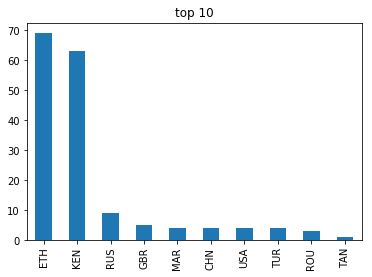

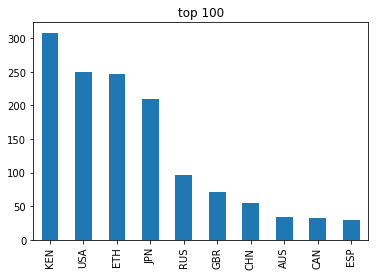

In [5]:
plt.figure()
deseterica['nationality'].value_counts()[:10].plot(kind='bar', title = "top 10" )
plt.figure()
stoterica['nationality'].value_counts()[:10].plot(kind='bar', title = "top 100" )

plt.show()

Zanimivo je, da so se med deseterico najboljših največkrat uvrstile etiopijske tekačice, medtem ko so se v stoterici največkrat znašle Kenijke. Komu bi torej lahko pripisali zmago v etiopijsko-kenijski tekaški vojni?


Med atletinjami, bi kot najbolj uspešno lahko izpostavili Faith Kipyegon.

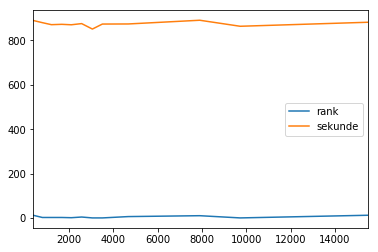

In [9]:
#poglejmo si razvoj rezultata aktualne svetovn prvakinje
tablice[tablice['name'] =='Tirunesh DIBABA'].plot()

Razvoj rezultata aktualne svetovne prvakinje.

In [7]:
#trik, da čase pretvorimo v sekunde 
df = pd.DataFrame({'cas' : pd.to_datetime(tablice['time'], format="%M:%S.%f"), 'razlika': datetime.datetime(1900,1,1,0,0,0)})

df['sekunde'] = df['cas'] - df['razlika']
df['sekunde'] = df['sekunde'].dt.total_seconds().astype(float)

#trik, da sekunde pretvorimo v čase

j = df['sekunde'].mean()
str(datetime.timedelta(seconds=j))

'0:16:28.222802'

Vidimo torej, da povprečen čas na 5000m znaša 16:28.223s.

In [8]:
tablice['sekunde'] = df['sekunde']
povprecje = tablice.groupby('rank')['sekunde'].mean()

povprecje['pov'] = pd.to_datetime(povprecje, unit='s').dt.time
povprecje['pov'].head(10)

rank
1     00:14:24.201176
2     00:14:27.855294
3     00:14:31.775882
4     00:14:34.707059
5     00:14:36.271667
6     00:14:38.770625
7     00:14:39.791765
8     00:14:41.945294
9     00:14:43.830588
10    00:14:45.031176
Name: sekunde, dtype: object

Zanimivo je videti, kako se povprečni čas spreminja z uvrstitvjijo.